<h1 style="color:#07B30C" align="center"> Tarea 3, Módulo 3</h1>
<h2 style="color:#07B30C"align="center"> Daniela Arely Morales Hernández </h2>
<h3 style="color:#07B30C"align="center"> 142976 </h3>

<h2 style="color:crimson">Ejercicios</h2>

1. Repite el ejemplo *Arxiv ML Papers (I)*, agrega dos nuevas columnas al DataFrame final: `Abstract`, con el resumen de cada paper; `Submitted`, con la fecha en la que fue agregado al sistema. **Hint**: Ambos elementos se encuentran dentro de la *url* encontrada.

----



In [2]:
from requests_html import HTMLSession
import pandas as pd
import re


def extract_abstract(sess, url):
    r = sess.get(url)
    abstract = r.html.find("blockquote[class='abstract mathjax']", first=True).text
    dates = r.html.find("div[class='dateline']", first=True).text

    dates, *_ = re.findall("(?<= on ).*(?=\))"  ,dates)
    abstract, *_ = re.findall("(?<=Abstract\: ).*"  , abstract)
    
    return abstract, dates


In [4]:
url = "https://arxiv.org/list/stat.ML/recent"
with HTMLSession() as sess:
    r = sess.get(url)
r
divpage = r.html.find("div[id='dlpage']", first=True)
p_links = divpage.find("dt")
p_titles = divpage.find("dd")


valores = []

with HTMLSession() as sess:
    for link_secc, title_secc in zip(p_links, p_titles):
        title = title_secc.find("div[class='list-title mathjax']", first=True).text

        abstract_url = link_secc.find("a[title='Abstract']", first=True).absolute_links
        abstract_url, *_ = abstract_url

        abstract, dates = extract_abstract(sess, abstract_url)
        valores.append([title, abstract_url, abstract, dates])
        
df_values = pd.DataFrame(valores, columns=["title", "url" , "abstract", "submitted"])
df_values.head()



,title,url,abstract,submitted
0,Title: Self-Tuning Deep Reinforcement Learning,https://arxiv.org/abs/2002.12928,Reinforcement learning (RL) algorithms often r...,28 Feb 2020
1,Title: The estimation error of general first o...,https://arxiv.org/abs/2002.12903,Modern large-scale statistical models require ...,28 Feb 2020
2,Title: Generalizing Convolutional Neural Netwo...,https://arxiv.org/abs/2002.12880,The translation equivariance of convolutional ...,25 Feb 2020
3,Title: A Deep Generative Model for Fragment-Ba...,https://arxiv.org/abs/2002.12826,Molecule generation is a challenging open prob...,28 Feb 2020
4,Title: Risk Bounds for Multi-layer Perceptrons...,https://arxiv.org/abs/2002.12640,We characterize the behavior of integral opera...,28 Feb 2020



 2. Por medio de la librería `requests` y el API de AlphaVantage, consigue los precios históricos de las monedas `["MXN", "EUR", "BRL", "ARS", "CHF"]` respecto al dólar (todos los precios deben estar en dólares). Crea un DataFrame con cada colúmna la moneda de referencia:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>MXN</th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2014-11-24</th>      <td>0.0732</td>      <td>1.2438</td>      <td>0.3920</td>      <td>0.1169</td>      <td>1.0342</td>    </tr>    <tr>      <th>2014-11-25</th>      <td>0.0731</td>      <td>1.2473</td>      <td>0.3955</td>      <td>0.1169</td>      <td>1.0370</td>    </tr>    <tr>      <th>2014-11-26</th>      <td>0.0728</td>      <td>1.2507</td>      <td>0.3995</td>      <td>0.1168</td>      <td>1.0401</td>    </tr>    <tr>      <th>2014-11-27</th>      <td>0.0726</td>      <td>1.2458</td>      <td>0.3947</td>      <td>0.1169</td>      <td>1.0363</td>    </tr>    <tr>      <th>2014-11-28</th>      <td>0.0717</td>      <td>1.2451</td>      <td>0.3891</td>      <td>0.1168</td>      <td>1.0351</td>    </tr>  </tbody></table>




In [15]:
import requests
import os
from collections import defaultdict
from alpha_vantage.foreignexchange import ForeignExchange

os.environ["ALPHA_VANTAGE_KEY"] = "Q8O3B78W0NOUZ3B0"
avkey = os.environ["ALPHA_VANTAGE_KEY"]
url = "https://www.alphavantage.co/query"


def divisas(avkey, moneda, url):
    daily = {
        "function": "FX_DAILY",
        "to_symbol": "USD",
        "from_symbol": moneda,
        "apikey": avkey,
        "outputsize": "full",
        }
    r = requests.get(url, params=daily) 
    data = r.json()
    
    p = defaultdict(dict)
    for key, values in data['Time Series FX (Daily)'].items():
        p[key] = values['4. close']
    return p

mon = ["MXN", "EUR", "BRL", "ARS", "CHF"]
mon_precios = defaultdict(dict)


for m in mon:
    data = divisas(avkey, m, url)
    mon_precios[m] = data
    
df_data = pd.DataFrame(mon_precios, dtype=float).dropna().sort_index()

df_data.head()

,MXN,EUR,BRL,ARS,CHF
2014-11-07,0.0737,1.2454,0.3902,0.117,1.0341
2014-11-09,0.0738,1.2462,0.3894,0.117,1.0359
2014-11-10,0.0734,1.2424,0.3933,0.117,1.0328
2014-11-11,0.0735,1.2473,0.3894,0.117,1.0364
2014-11-12,0.0737,1.2428,0.3890,0.117,1.0337


----
3. Con el DataFrame creado en el ejercicio 2, crea el siguiente mapa de calor con la correlación entre cada una de las monedas. **hint**: Revisa que métodos tiene un DataFrame para crear correlaciones; considera la librería `seaborn`.

[](C:/Desktop/DATA/Modificado/Modulo3/lec04/imgs/heatmap.png)

---



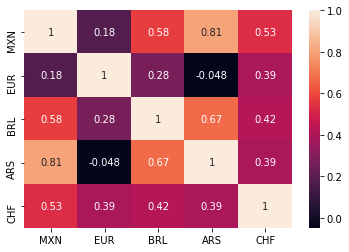

In [17]:
import seaborn as sns

maph = sns.heatmap(df_data.corr(), annot = True)

4. Con el DataFrame creado en el ejercicio 2, crea un nuevo DataFrame que incluya una correlación móvil con ventana de 30 días de cada una de las monedas respecto a `"MXN"`. **hint**: Investiga sobre el método `.xs` de un DataFrame

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>EUR</th>      <th>BRL</th>      <th>ARS</th>      <th>CHF</th>    </tr>  </thead>  <tbody>    <tr>      <th>2015-03-19</th>      <td>0.900941</td>      <td>0.870440</td>      <td>0.835029</td>      <td>0.916637</td>    </tr>    <tr>      <th>2015-03-20</th>      <td>0.874866</td>      <td>0.815453</td>      <td>0.762308</td>      <td>0.903594</td>    </tr>    <tr>      <th>2015-03-22</th>      <td>0.866783</td>      <td>0.789977</td>      <td>0.726098</td>      <td>0.900547</td>    </tr>    <tr>      <th>2015-03-23</th>      <td>0.835823</td>      <td>0.728781</td>      <td>0.643129</td>      <td>0.885424</td>    </tr>    <tr>      <th>2015-03-24</th>      <td>0.801267</td>      <td>0.671188</td>      <td>0.560149</td>      <td>0.877682</td>    </tr>  </tbody></table>

---



In [23]:
import matplotlib.pyplot as plt

corr_t= pd.DataFrame()

corr_t['EUR'] = df_data['MXN'].rolling(30).corr(df_data['EUR'])
corr_t['BRL'] = df_data['MXN'].rolling(30).corr(df_data['BRL'])
corr_t['ARS'] = df_data['MXN'].rolling(30).corr(df_data['ARS'])
corr_t['CHF'] = df_data['MXN'].rolling(30).corr(df_data['CHF'])

corr_t.loc['2019-03-01':'2019-03-31']

,EUR,BRL,ARS,CHF
2019-03-01,0.663426,0.295116,0.547056,0.729675
2019-03-03,0.629168,0.435531,0.539075,0.660459
2019-03-04,0.610054,0.552597,0.534596,0.601975
2019-03-05,0.585981,0.591989,0.524518,0.565951
2019-03-06,0.589314,0.631945,0.567323,0.575840
2019-03-07,0.687593,0.736321,0.681571,0.675476
2019-03-08,0.724939,0.780038,0.714933,0.700804
2019-03-10,0.757801,0.803465,0.735405,0.719775
2019-03-11,0.768108,0.808194,0.739236,0.722039
2019-03-12,0.746153,0.789016,0.703075,0.716743


5. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura con _scatterplots_ entre todas las combinaciones de las correlaciones respecto a `"MXN"`. ¿Encuentras algún patrón en alguna combinación?

![](../files/lec04/imgs/scatter.png)

---



C:\Users\danie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\danie\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


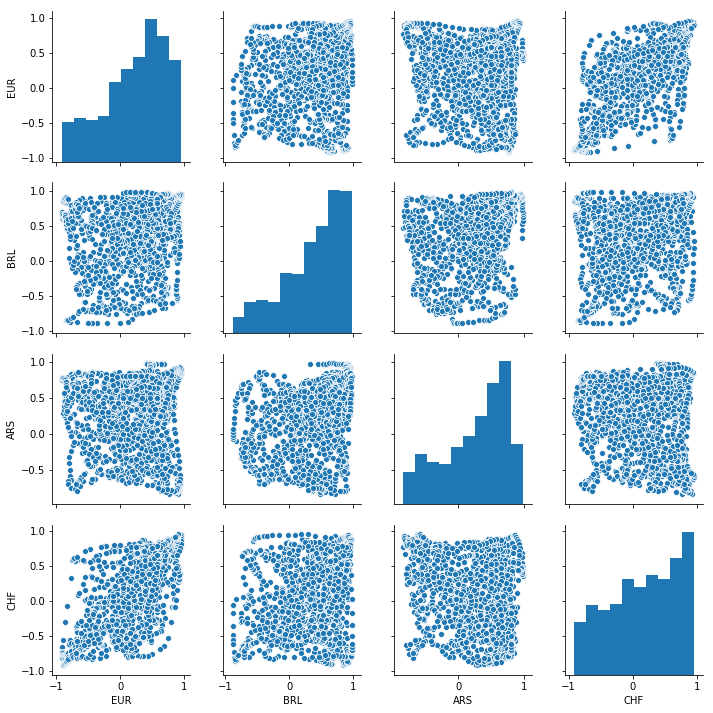

In [27]:
sns.pairplot(corr_t, vars = ["EUR","BRL","ARS","CHF"])

6. Con el DataFrame creado en el ejercicio 4, crea la siguiente figura, la cuál representa, a cada observación, la correlación promedio entre todas las monedas respecto a `"MXN"` y unas bandas que representan la correlación máxima y mínima a cada observación.

![](../files/lec04/imgs/corr_ts.png)

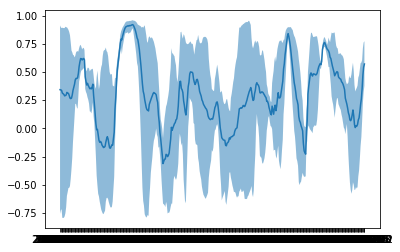

In [31]:
corr_t['avg'] = corr_t.mean(axis=1)
corr_t['min'] = corr_t.min(axis=1)
corr_t['max'] = corr_t.max(axis=1)

corr_t
corr_g = corr_t[['avg', 'min', 'max']][1000:1400]

plt.plot(corr_g['avg'])
plt.fill_between(range(corr_g['avg'].shape[0]), corr_g['min'], corr_g['max'],alpha=0.5)
plt.show()